In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
# dataset creation

data = {
    "semester_percentage":[71.9, 74.6, 75.4, 64.2, 72.3],
    "scholarship_exam_marks":[26,38,40, 8,17],
    "got_scholarship":[1,1,1,1,0]
}

df = pd.DataFrame(data)

df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_94144\1737763189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])
C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_94144\1737763189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_

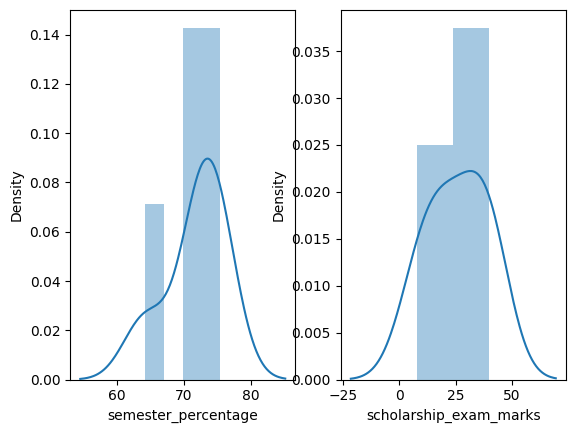

In [168]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage'])
plt.subplot(1,2,2)
sns.distplot(df['scholarship_exam_marks'])
plt.show()

In [169]:
mean = df['semester_percentage'].mean()
std = df['semester_percentage'].std()

print(mean," ",std)

71.68   4.437003493349987


In [170]:
h_limit = mean + 3*std
l_limit = mean - 3*std

print(h_limit," ",l_limit)

84.99101048004997   58.36898951995005


In [171]:
# approach-1: Trimming

df = df[(df['semester_percentage']>l_limit) & (df['semester_percentage']<h_limit)]

df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [172]:
def z_score(num, mean, std):
    return (num-mean)/std

In [173]:
# approach-2: Z-Score

df["z_score"] = [z_score(x, mean, std) for x in df["semester_percentage"]]

df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.049583
1,74.6,38,1,0.658102
2,75.4,40,1,0.838404
3,64.2,8,1,-1.685822
4,72.3,17,0,0.139734


In [174]:
# trim outliers (less than -3 or greater than 3)

df = df[(df["z_score"] > -3) & (df["z_score"] < 3)]

df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.049583
1,74.6,38,1,0.658102
2,75.4,40,1,0.838404
3,64.2,8,1,-1.685822
4,72.3,17,0,0.139734


In [175]:
# approach-2: capping (Instade of trimming replace the outliers with the highest or lowest value)

for index, value in enumerate(df["semester_percentage"]):
    if value > h_limit:
        df.loc[index, "semester_percentage"] = h_limit
    elif value < l_limit:
        df.loc[index, "semester_percentage"] = l_limit


df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.049583
1,74.6,38,1,0.658102
2,75.4,40,1,0.838404
3,64.2,8,1,-1.685822
4,72.3,17,0,0.139734


<Axes: ylabel='scholarship_exam_marks'>

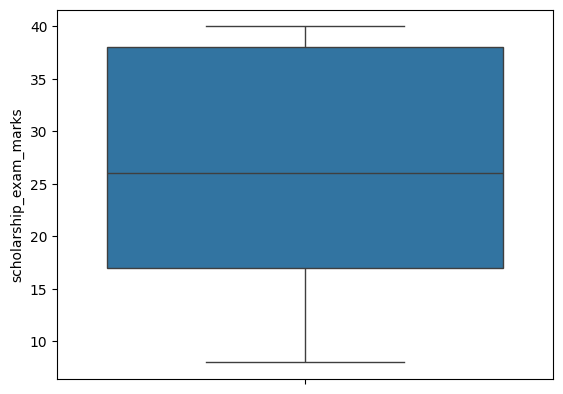

In [176]:
# approach-3 : IQR (Inter Quartile Range)

sns.boxplot(df['scholarship_exam_marks'])

In [177]:
q1 = df['scholarship_exam_marks'].quantile(0.25)
q3 = df['scholarship_exam_marks'].quantile(0.75)

print(q1," ",q3)

17.0   38.0


In [178]:
irq = q3 - q1

irq

21.0

In [179]:
min_val = q1 - 1.5 * irq
max_val = q3 + 1.5 * irq

print(min_val," ",max_val)

-14.5   69.5


In [180]:
# capping

for index,value in enumerate(df['scholarship_exam_marks']):
    if value > max_val:
        df.loc[index, "scholarship_exam_marks"] = max_val
    elif value < min_val:
        df.loc[index, "scholarship_exam_marks"] = min_val

df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.049583
1,74.6,38,1,0.658102
2,75.4,40,1,0.838404
3,64.2,8,1,-1.685822
4,72.3,17,0,0.139734


**Working on a large dataset**

In [182]:
from sklearn.datasets import load_iris

df1 = load_iris()

x = df1.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [184]:
y = df1.target

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [189]:
col = df1.feature_names

col

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [190]:
data = pd.DataFrame(data=x, columns=col)

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_94144\2606977822.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['petal length (cm)'])
C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_94144\2606977822.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['petal width (cm

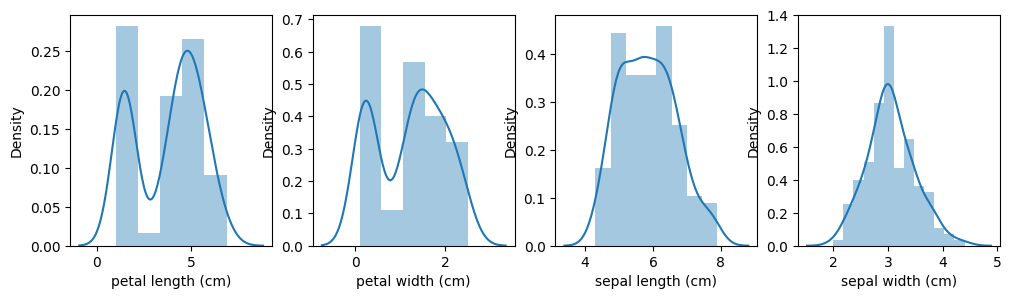

In [197]:
plt.figure(figsize=(12,3))

plt.subplot(1,4,1)
sns.distplot(data['petal length (cm)'])
plt.subplot(1,4,2)
sns.distplot(data['petal width (cm)'])
plt.subplot(1,4,3)
sns.distplot(data['sepal length (cm)'])
plt.subplot(1,4,4)
sns.distplot(data['sepal width (cm)'])

plt.show()

**Check outliers in first 2 columns**

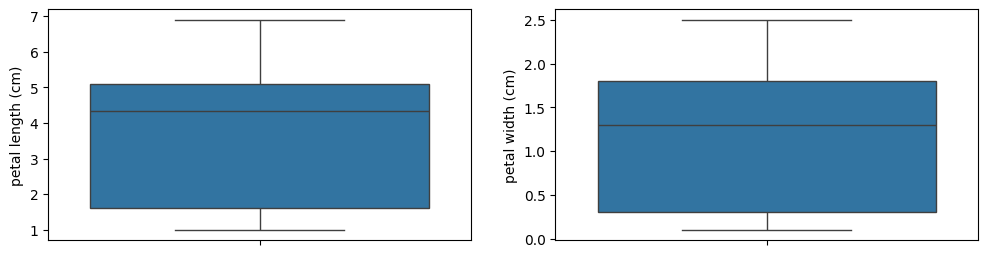

In [198]:
# first 2 is not normal so IQR will be applied

plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
sns.boxplot(data['petal length (cm)'])
plt.subplot(1,2,2)
sns.boxplot(data['petal width (cm)'])

plt.show()

# no outlier present so move to the other two column

**Check sepal length**

In [199]:
# normal graph so normal distribution will be applied

mean1 = data['sepal length (cm)'].mean()
std1 = data['sepal length (cm)'].std()

upper_bound = mean1 + 3*std1
lower_bound = mean1 - 3*std1

print(upper_bound," ",lower_bound)

8.327531717266922   3.3591349493997447


In [200]:
data[(data['sepal length (cm)'] < lower_bound) | (data['sepal length (cm)'] > upper_bound)]

# means no outliers present in this column also

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


**Check sepal width**

In [201]:
# normal graph so normal distribution will be applied

mean2 = data['sepal width (cm)'].mean()
std2 = data['sepal width (cm)'].std()

upper_bound = mean2 + 3*std2
lower_bound = mean2 - 3*std2

print(upper_bound," ",lower_bound)

4.364932188143428   1.749734478523239


In [205]:
data[(data['sepal width (cm)'] < lower_bound) | (data['sepal width (cm)'] > upper_bound)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4


In [207]:
# only one so trim

data = data[(data['sepal width (cm)'] >= lower_bound) & (data['sepal width (cm)'] <= upper_bound)]

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [208]:
data[(data['sepal width (cm)'] < lower_bound) | (data['sepal width (cm)'] > upper_bound)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


C:\Users\Subhadeep_Sarkar\AppData\Local\Temp\ipykernel_94144\2476341443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal width (cm)'])


<Axes: xlabel='sepal width (cm)', ylabel='Density'>

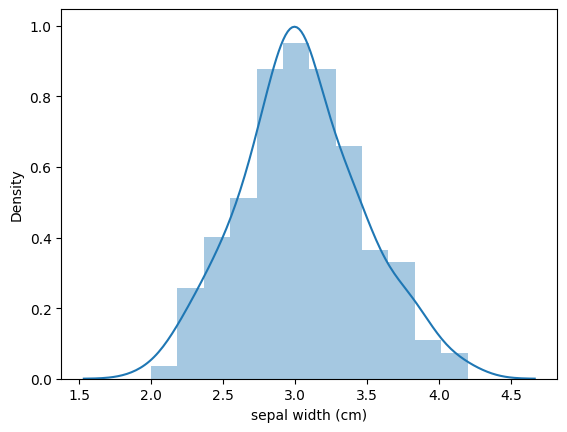

In [210]:
sns.distplot(data['sepal width (cm)'])

**That's All**